## Wine Classification

##### The project involves the application of the Random Forest Classifier, Support Vector Machine, Logistic Regression and Decision Tree to the wine dataset from the sklearn.datasets package in Python. This dataset is the result of a chemical analysis of wines grown in Italy, derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. The goal of the project is to build a model that can  classify the type of wine based on these 13 constituents. The performance of the model will be evaluated using accuracy as the metric.

In [5]:
# Import necessary libraries
%pip install pandas matplotlib scikit-learn seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Dataset Analysis

##### The wine dataset is a multi-class classification dataset. It contains 178 samples with 13 chemical analysis determined constituents as features. The target variable is the type of wine, which can be one of three possible classes.

##### A correlation heatmap is a graphical representation of the correlation matrix, which is a table showing correlation coefficients between sets of variables. Each cell in the table shows the correlation between two variables. In the heatmap, correlation coefficients are color-coded, where the color scale represents the correlation coefficient. This makes it easy to visually inspect the correlation matrix.

##### In our case, each cell in the heatmap corresponds to the correlation coefficient between two features of the wine dataset. The correlation coefficient is a statistical measure that calculates the strength of the relationship between the relative movements of the two variables. The range of values of the correlation coefficient is -1 to 1.

##### A correlation coefficient of 1 means that for every positive increase in one variable, there is a positive increase of a fixed proportion in the other. For example, shoe sizes go up in (almost) perfect correlation with foot length.
##### A correlation coefficient of -1 means that for every positive increase in one variable, there is a negative decrease of a fixed proportion in the other. For example, the amount of gas in a tank decreases in (almost) perfect correlation with speed.
##### Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

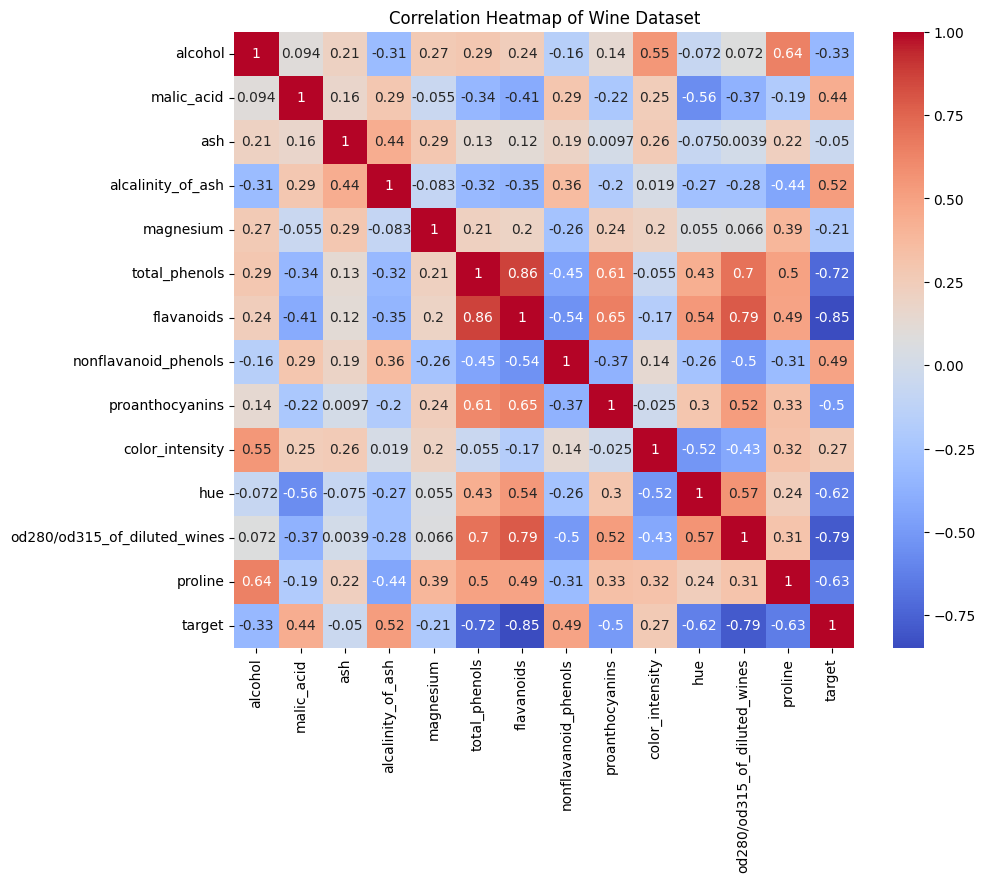

In [6]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
print(df.describe())

# Class distribution
print(df['target'].value_counts())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Dataset')
plt.show()



### Training a Random Forrest model to predict the wine type

Here’s a breakdown of what each part does:

- Import necessary libraries
- Load wine dataset: The load_wine function loads the wine dataset from sklearn.datasets. The data is then converted into a pandas DataFrame for easier manipulation.
- Split the data into train and test sets: The train_test_split function splits the dataset into a training set and a testing set. The training set is used to train the model, and the testing set is used to evaluate the model’s performance. The test_size=0.2 argument means that 20% of the data is used for the testing set, and the rest is used for the training set.
- Initialize the model: A Random Forest Classifier is initialized with n_estimators=100. This means that the Random Forest will consist of 100 trees.
- Train the model: The fit function trains the model on the training data. It adjusts the model’s parameters based on the data and the labels (the type of wine).
- Make predictions: The predict function is used to make predictions on the testing data based on the trained model.
- Check the accuracy: The accuracy_score function compares the model’s predictions to the actual labels of the testing data to calculate the accuracy of the model.


In [7]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=22)

# Initialize the model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9722222222222222


### Evaluation

In this code, we first compute the confusion matrix using the confusion_matrix function from sklearn.metrics. This gives us a matrix where the entry in the i-th row and j-th column is the number of observations that are from group i but were predicted to be in group j.

We also print a classification report using the classification_report function from sklearn.metrics. This report includes the precision, recall, f1-score, and support for each class, giving us a more detailed view of the model’s performance.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



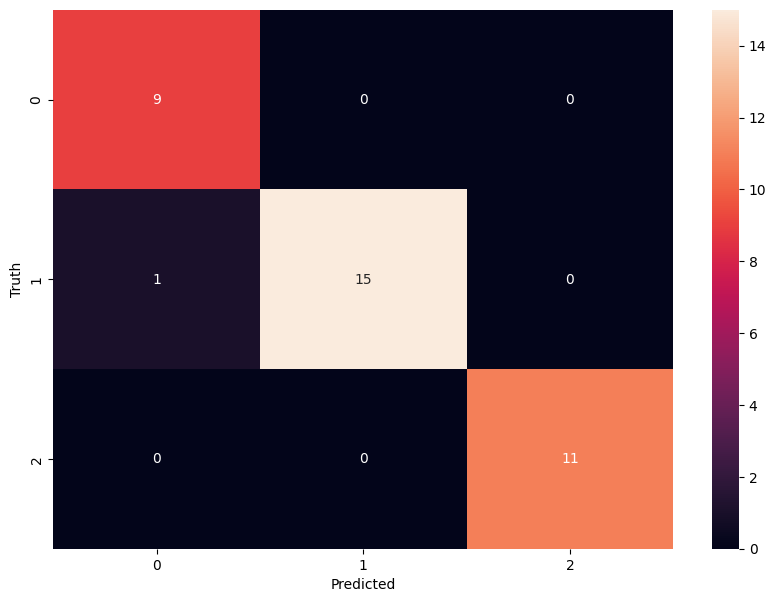

In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Classification Report
print(classification_report(y_test, predictions))

### Comparision with Suppoert Vector Machine, Decision Tree and Logistic Regression

This code first loads the wine dataset and splits it into a training set and a testing set. Then, it initializes four different models: Decision Tree, Support Vector Machine, Logistic Regression, and Random Forest. Each model is trained on the training data and used to make predictions on the testing data. The accuracy of each model is then printed out.

In [9]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=22)

# Initialize the models
dt_model = DecisionTreeClassifier(max_depth=5)
svm_model = SVC(kernel='rbf')
lr_model = LogisticRegression(max_iter=10000)
rf_model = RandomForestClassifier(n_estimators=100)

# Train the models
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Make predictions
dt_predictions = dt_model.predict(X_test)
svm_predictions = svm_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Check the accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

# print(f"Decision Tree Model Accuracy: {dt_accuracy}")
# print(f"Support Vector Machine Model Accuracy: {svm_accuracy}")
# print(f"Logistic Regression Model Accuracy: {lr_accuracy}")
# print(f"Random Forest Model Accuracy: {rf_accuracy}")

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Support Vector Machine', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [dt_accuracy, svm_accuracy, lr_accuracy, rf_accuracy]
})

print(comparison_df)

                    Model  Accuracy
0           Decision Tree  0.888889
1  Support Vector Machine  0.638889
2     Logistic Regression  0.944444
3           Random Forest  0.944444


### Same Dataset but using a simple Neural Network (NN)

In [10]:
%pip install tensorflow

  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached rich-13.9.4-py3-none-any.whl.metadata (18 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 MB 5.3 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 6.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 6.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━

/opt/homebrew/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


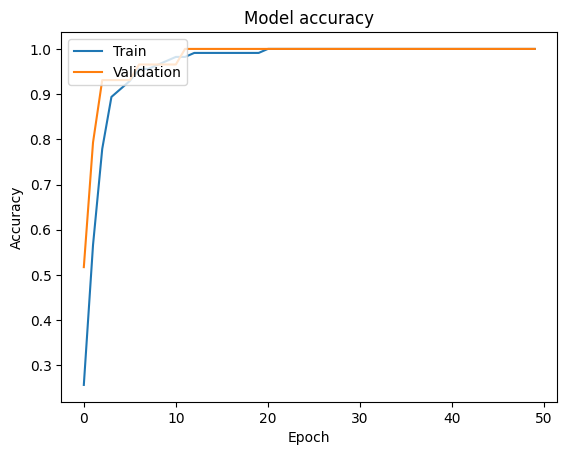

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Neural Network Model Accuracy: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       0.94      0.94      0.94        16
           2       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



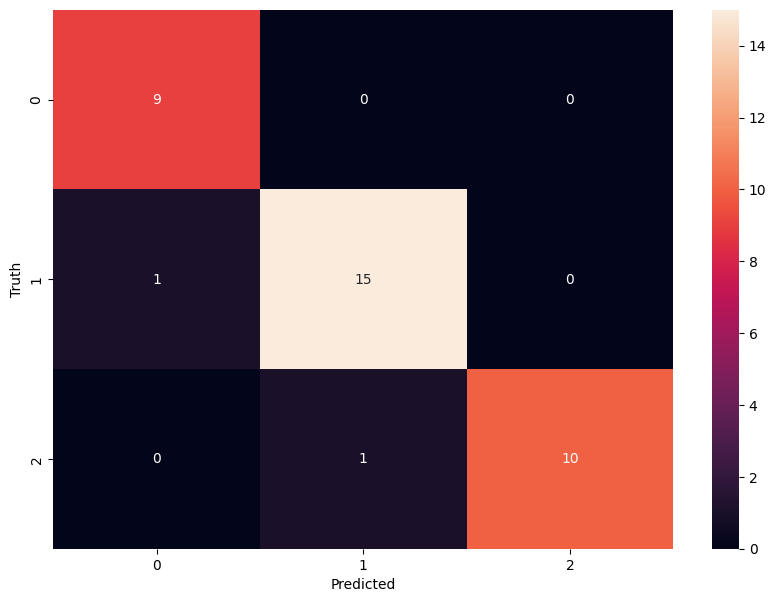

In [11]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load wine dataset
wine = load_wine()
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = wine.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=22)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

# Create a Sequential model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(13,)))

# Add the second hidden layer
model.add(Dense(64, activation='relu'))

# Add the output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and record the history
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=0)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Convert predictions to label
pred = list()
for i in range(len(predictions)):
    pred.append(np.argmax(predictions[i]))
#Converting one hot encoded test label to label
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

# Check the accuracy
accuracy = accuracy_score(test, pred)
print(f"Neural Network Model Accuracy: {accuracy}")

# Print the confusion matrix
cm = confusion_matrix(test, pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Print the classification report
print(classification_report(test, pred))
